In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import pickle

In [2]:
df = pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [4]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


<AxesSubplot:>

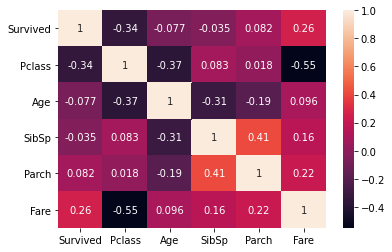

In [6]:
sns.heatmap(df.corr(),annot=True)

In [7]:
pclass = df['Pclass'].unique()

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

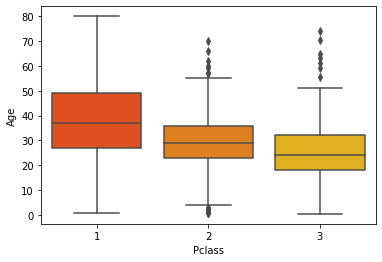

In [8]:
sns.boxplot(x='Pclass',y='Age',data=df,palette='autumn')

In [9]:
df['Age'].groupby(df['Pclass']).median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [10]:
df['Age'].fillna(df['Age'].groupby(df['Pclass']).transform('median'),inplace=True)

In [11]:
df['Age'].isnull().sum()

0

In [12]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
df['Embarked'].fillna(df['Embarked'].value_counts().index[0],inplace=True)

In [14]:
df['Embarked'].isnull().sum()

0

In [15]:
df['Cabin'] = df['Cabin'].str.get(0)

In [16]:
df['Cabin'].fillna('Unknown',inplace=True)

In [17]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,Unknown,S
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,Unknown,S
3,1,1,female,35.0,1,0,53.1000,C,S
4,0,3,male,35.0,0,0,8.0500,Unknown,S


In [18]:
df['Family_Size'] = df['SibSp'] + df['Parch'] + 1
df.drop(['SibSp','Parch'],axis=1,inplace=True)

In [19]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Family_Size
0,0,3,male,22.0,7.2500,Unknown,S,2
1,1,1,female,38.0,71.2833,C,C,2
2,1,3,female,26.0,7.9250,Unknown,S,1
3,1,1,female,35.0,53.1000,C,S,2
4,0,3,male,35.0,8.0500,Unknown,S,1


In [20]:
X = df.iloc[:,1:]
Y = df.iloc[:,0]

In [21]:
X.shape

(891, 7)

In [22]:
temp_data = X.loc[:,['Sex','Cabin','Embarked']]

In [23]:
encoder = OneHotEncoder(drop='first',sparse_output=False)

encoder.fit(temp_data)


OneHotEncoder(drop='first', sparse_output=False)

In [24]:
def get_encoder(df):
    transformed_df = pd.DataFrame(data=encoder.transform(df),columns=encoder.get_feature_names_out())
    X.drop(columns=['Sex','Cabin','Embarked'],axis=1,inplace=True)
    df = pd.concat([X, transformed_df],axis=1)
    return df

X = get_encoder(temp_data)

In [25]:
X.head()

,Pclass,Age,Fare,Family_Size,Sex_male,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_Unknown,Embarked_Q,Embarked_S
0,3,22.0,7.2500,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1,38.0,71.2833,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,26.0,7.9250,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,1,35.0,53.1000,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3,35.0,8.0500,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [26]:
a = list(encoder.get_feature_names_out())
columns = ['Pclass','Age','Fare','Family_size']+a

In [27]:
scaler = StandardScaler()
X = scaler.fit_transform(X) 

In [32]:
X = pd.DataFrame(X,columns=columns)
X.head()

,Pclass,Age,Fare,Family_size,Sex_male,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_Unknown,Embarked_Q,Embarked_S
0,0.827377,-0.533834,-0.502445,0.059160,0.737695,-0.235981,-0.266296,-0.196116,-0.193009,-0.121681,-0.067153,-0.03352,0.544925,-0.307562,0.615838
1,-1.566107,0.674891,0.786845,0.059160,-1.355574,-0.235981,3.755222,-0.196116,-0.193009,-0.121681,-0.067153,-0.03352,-1.835115,-0.307562,-1.623803
2,0.827377,-0.231653,-0.488854,-0.560975,-1.355574,-0.235981,-0.266296,-0.196116,-0.193009,-0.121681,-0.067153,-0.03352,0.544925,-0.307562,0.615838
3,-1.566107,0.448255,0.420730,0.059160,-1.355574,-0.235981,3.755222,-0.196116,-0.193009,-0.121681,-0.067153,-0.03352,-1.835115,-0.307562,0.615838
4,0.827377,0.448255,-0.486337,-0.560975,0.737695,-0.235981,-0.266296,-0.196116,-0.193009,-0.121681,-0.067153,-0.03352,0.544925,-0.307562,0.615838


In [29]:
model = LogisticRegression()
model.fit(X,Y)

LogisticRegression()

In [31]:
pickle.dump(model,open('titanicLR.pickle','wb'))